# Dynamic Programming and Optimal Control
## Problem Set 1, Problem 9

ETH Zurich \
Institute for Dynamic Systems and Control

**Python script that solves Problem 9 of Problem Set 1 by applying the DP algorithm.**

**We use [NumPy](https://numpy.org/), [pandas](https://pandas.pydata.org/) and [matplotlib](https://matplotlib.org/). You can install these packages using `pip install` or `conda install` command depending on your package manager. You can also find the installation guide in the package websites or documentations.**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

p_w = 1 / 3  # probability that wk = 1
num_states = 11  # x = 0, ..., 10 -> there are 11 possible states
num_inputs = 11  # 0 <= xk + uk <= 10 -> there are always 11 possible inputs
num_timesteps = 10  # corresponds to N
x = np.arange(0, num_states)  # state vector containing all possible states 0, ..., 10
# matrix that will store the optimal cost-to-go for each possible state and for each
# time step
J_opt = np.zeros((num_states, num_timesteps + 1))
# matrix that will store the optimal input for each possible state and for each time
# step (except the last one)
u_opt = np.zeros((num_states, num_timesteps))

J_opt[:, -1] = np.power(x, 2)
for k in range(num_timesteps - 1, -1, -1):  # start at k = N-1 and decrease to k = 0
    # Iterate over all possible states
    for i in range(num_states):
        # Read state
        xk = x[i]
        # Determine set of allowed inputs
        set_Uk = np.arange(-xk, 10 - xk + 1, 1)  # this implements 0 <= xk + uk <= 10
        # print(f"Set uK: {set_Uk}")

        # Compute expected cost-to-go for each allowed input
        cost_to_go = np.zeros((1, num_inputs))
        for m in range(num_inputs):
            # Read input
            uk = set_Uk[m]

            # Compute cost-to-go for this input
            x_ref = (k - 5) ** 2
            cost_to_go[0, m] = (
                (xk - x_ref) ** 2
                + uk**2
                + p_w * J_opt[xk + uk, k + 1]
                + (1 - p_w) * J_opt[xk, k + 1]
            )

        # Find minimal cost-to-go and corresponding optimal input
        J_opt[i, k] = float(np.min(cost_to_go, 1))
        index_u_opt = int(np.argmin(cost_to_go, 1))
        u_opt[i, k] = set_Uk[index_u_opt]

<ipython-input-1-6ac13617611c>:44: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  J_opt[i, k] = float(np.min(cost_to_go, 1))
<ipython-input-1-6ac13617611c>:45: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  index_u_opt = int(np.argmin(cost_to_go, 1))


### Print the result

In [2]:
row_labels = [f"x = {i}" for i in range(0, num_states)]
column_labels = [f"k = {i}" for i in range(0, num_timesteps)]
df_input = pd.DataFrame(u_opt, columns=column_labels, index=row_labels)
column_labels.append(f"k = {num_timesteps}")
df_cost = pd.DataFrame(J_opt, columns=column_labels, index=row_labels)

print("Optimal final cost")
print(df_cost)
print("\n Optimal final input")
print(df_input)

Optimal final cost
              k = 0       k = 1       k = 2       k = 3       k = 4  \
x = 0   1134.815475  557.447493  321.638317  251.472794  244.998628   
x = 1   1036.762231  496.474470  284.178784  225.283493  220.714678   
x = 2    947.458026  443.518163  254.001524  206.969364  204.421125   
x = 3    868.597724  400.227709  234.065844  198.065844  197.065844   
x = 4    798.180731  366.551440  222.551440  197.551440  197.551440   
x = 5    737.371607  341.337753  220.337753  206.230910  207.570645   
x = 6    686.361818  326.439313  227.990093  223.869684  225.028807   
x = 7    644.206828  320.206828  243.315196  249.857339  251.500686   
x = 8    612.210656  323.212569  268.823807  285.120256  286.395062   
x = 9    588.601805  335.796423  302.699588  328.614540  329.407407   
x = 10   574.621247  356.825586  346.080780  381.686328  382.015089   

             k = 5       k = 6       k = 7       k = 8       k = 9  k = 10  
x = 0   256.637860  277.098765  304.925926  319.777

### Visualize the result
This is an example of how one can visualize the optimal policy.
We create a plot showing the state transitions for wk = 1 (for
wk = 0 the state does not change).


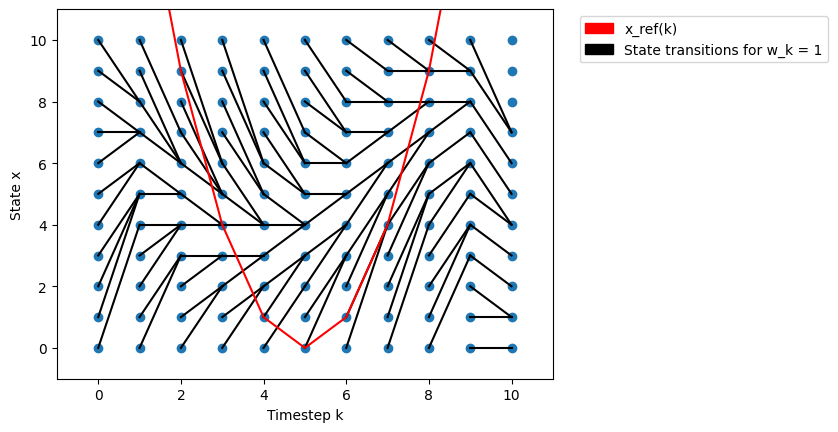

In [3]:
# Plot all states xk for all timesteps k
k = np.arange(0, num_timesteps + 1)
p, q = np.meshgrid(np.arange(0, num_timesteps + 1), x)
plt.scatter(p, q, marker="o")

# Plot state transitions from xk to xk + uk
x_plus_u = x + np.transpose(u_opt[:, 1])
for i in range(0, num_timesteps):
    kk = [i, i + 1]
    x_plus_u = x + np.transpose(u_opt[:, i])
    plt.plot(kk, np.array([x, x_plus_u]), "k")

# Plot x_ref( k )
plt.plot(k, np.power((k - 5), 2), "r")

# Do some formatting and labeling
plt.xlim((-1, num_timesteps + 1))
plt.ylim((x[0] - 1, x[-1] + 1))
plt.xlabel("Timestep k")
plt.ylabel("State x")

x_ref_patch = mpatches.Patch(color="red", label="x_ref(k)")
x_transition_patch = mpatches.Patch(
    color="black", label="State transitions for w_k = 1"
)
plt.legend(
    handles=[x_ref_patch, x_transition_patch],
    loc="upper left",
    bbox_to_anchor=(1.04, 1),
)
plt.show()